<a href="https://colab.research.google.com/github/Olumide1472/Projects/blob/main/AutoEncoder_AE_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load MNIST Fashion dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Define the size of the encoded representations
encoding_dim = 64
# Define the input layer
input_img = Input(shape=(784,))

# Define the encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoding layer
decoded = Dense(784, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Define the encoder model
encoder = Model(input_img, encoded)

# Define the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
# Change latent space dimensionality
encoding_dim = 128
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3727 - val_loss: 0.3164
Epoch 2/50
235/235 [==============================] - 6s 25ms/step - loss: 0.3024 - val_loss: 0.2945
Epoch 3/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2870 - val_loss: 0.2850
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.2797 - val_loss: 0.2794
Epoch 5/50
235/235 [==============================] - 3s 15ms/step - loss: 0.2754 - val_loss: 0.2761
Epoch 6/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2726 - val_loss: 0.2738
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.2707 - val_loss: 0.2722
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.2692 - val_loss: 0.2709
Epoch 9/50
235/235 [==============================] - 3s 15ms/step - loss: 0.2680 - val_loss: 0.2696
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2669 - val_lo

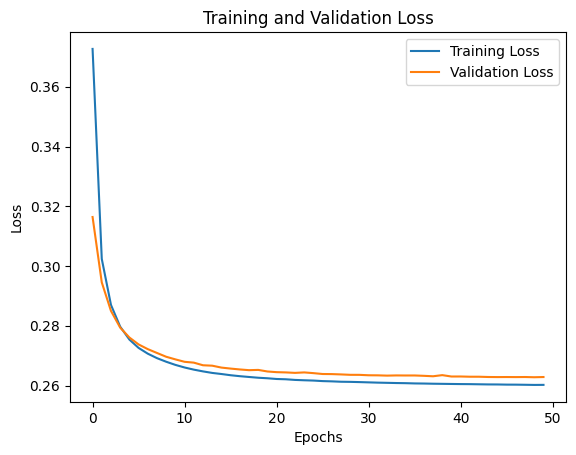

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


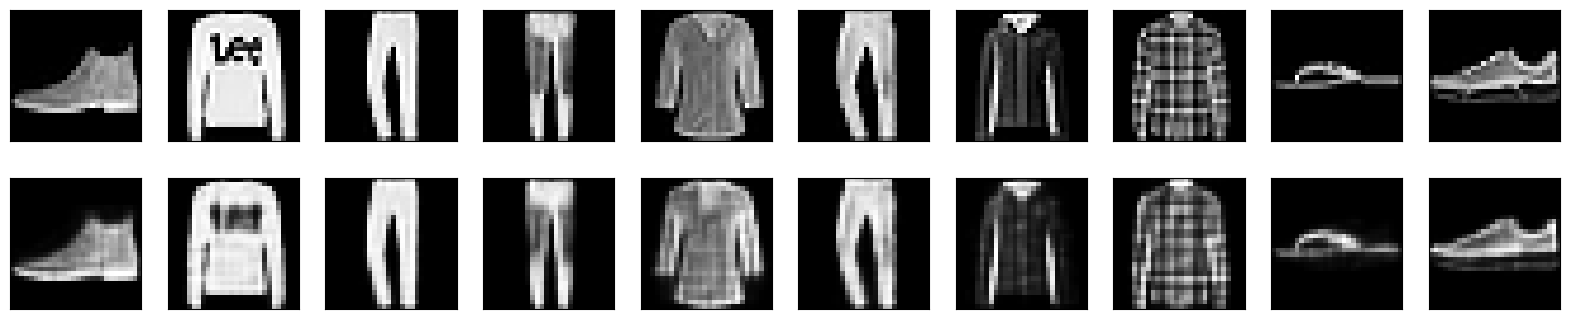

In [ ]:
# Using the autoencoder model
decoded_imgs_ae = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images by AE
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_ae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# Load MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Filter out only images of 2s and 4s for training
train_filter = np.where((y_train == 2) | (y_train == 4))
x_train_filtered, y_train_filtered = x_train[train_filter], y_train[train_filter]

# Normalize the images to [0, 1]
x_train_filtered = x_train_filtered.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train_filtered = x_train_filtered.reshape((x_train_filtered.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Change learning rate
vae.compile(optimizer=Adam(learning_rate=0.001))

# Define latent space dimensionality
latent_dim = 10
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Encoder
inputs = Input(shape=(784,))
h = Dense(256, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(256, activation='relu')
decoder_mean = Dense(784, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(inputs, x_decoded_mean)

# VAE loss
xent_loss = binary_crossentropy(inputs, x_decoded_mean) * 784
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

In [ ]:
# Train the VAE
vae.fit(x_train_filtered, shuffle=True, epochs=10, batch_size=256, validation_data=(x_test, None))

# Build the decoder model to reconstruct images from sampled latent vectors
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)


Epoch 1/10
47/47 [==============================] - 3s 37ms/step - loss: 394.9215 - val_loss: 407.4714
Epoch 2/10
47/47 [==============================] - 2s 34ms/step - loss: 340.6918 - val_loss: 379.6950
Epoch 3/10
47/47 [==============================] - 2s 39ms/step - loss: 325.6696 - val_loss: 383.9945
Epoch 4/10
47/47 [==============================] - 3s 72ms/step - loss: 318.3797 - val_loss: 353.3237
Epoch 5/10
47/47 [==============================] - 2s 47ms/step - loss: 314.5869 - val_loss: 346.4284
Epoch 6/10
47/47 [==============================] - 2s 36ms/step - loss: 311.4799 - val_loss: 346.4842
Epoch 7/10
47/47 [==============================] - 2s 37ms/step - loss: 309.0578 - val_loss: 338.3817
Epoch 8/10
47/47 [==============================] - 1s 30ms/step - loss: 307.0064 - val_loss: 338.3369
Epoch 9/10
47/47 [==============================] - 2s 34ms/step - loss: 304.9273 - val_loss: 331.8094
Epoch 10/10
47/47 [==============================] - 2s 34ms/step - loss:

1/1 [==============================] - 0s 94ms/step


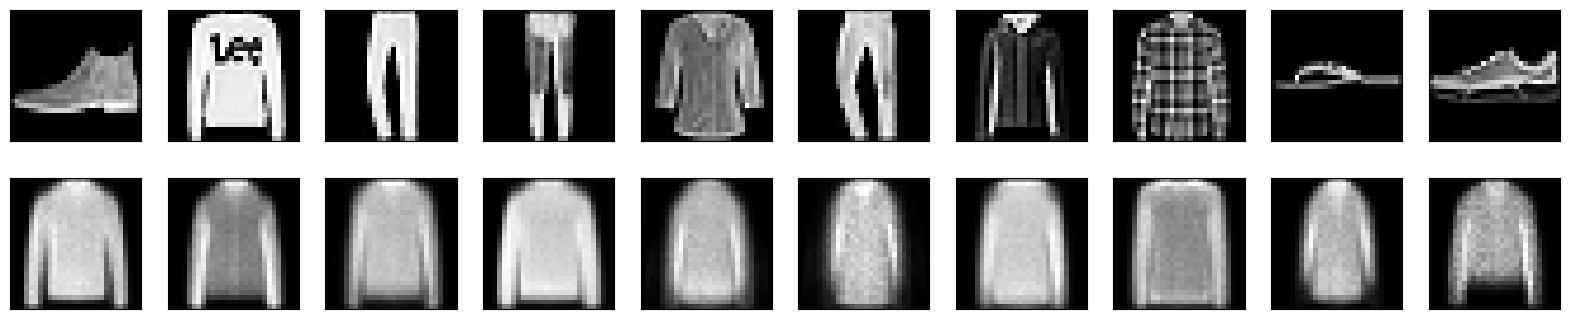

313/313 [==============================] - 1s 2ms/step


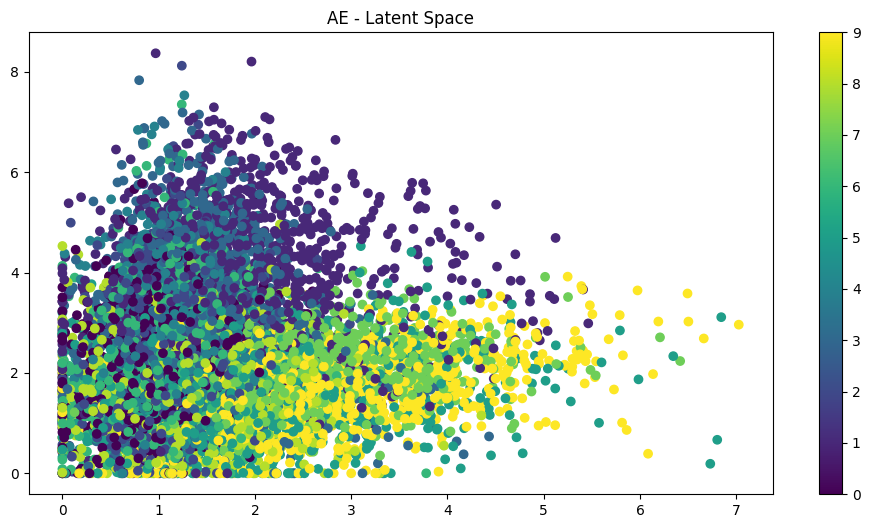

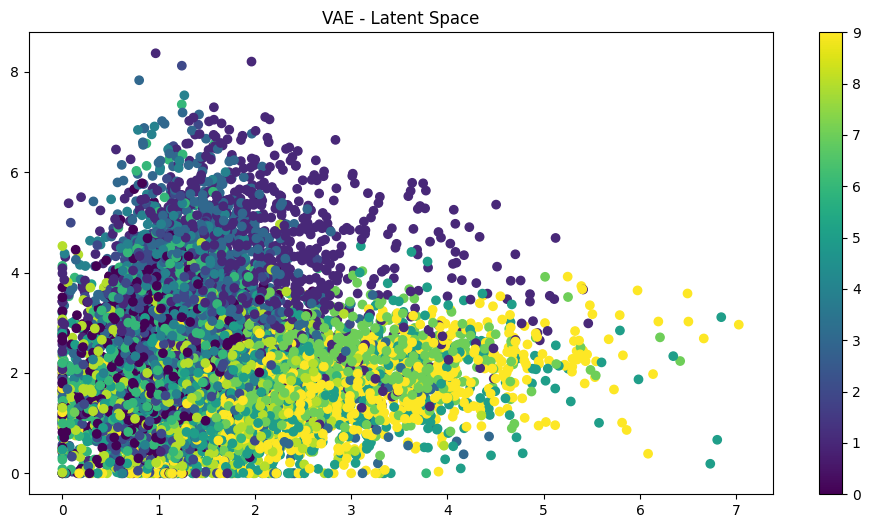

In [ ]:
# Using the model for VAE
decoded_imgs_vae = generator.predict(np.random.normal(size=(n, latent_dim)))

# Visualize original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images by VAE
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_vae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Using the previously defined 'encoder' model for AE
encoded_imgs_ae = encoder.predict(x_test)

# Using the previously defined 'vae' model for VAE
encoded_imgs_vae = encoder.predict(x_test)

# Visualize the encoded representations
plt.figure(figsize=(12, 6))
plt.scatter(encoded_imgs_ae[:, 0], encoded_imgs_ae[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title('AE - Latent Space')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(encoded_imgs_vae[:, 0], encoded_imgs_vae[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title('VAE - Latent Space')
plt.show()